# DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used in machine learning and data analysis. It is particularly effective for identifying clusters of varying shapes and sizes in datasets with noise.

### Key Features:
- **Density-Based Clustering**: DBSCAN groups points that are closely packed together, marking points in low-density regions as outliers.
- **No Predefined Number of Clusters**: Unlike k-means, DBSCAN does not require the number of clusters to be specified beforehand.
- **Handles Noise**: It can identify and exclude noise points (outliers) from the clusters.

### How It Works:
1. **Core Points**: A point is considered a core point if it has at least `min_samples` points (including itself) within a specified radius (`eps`).
2. **Reachable Points**: A point is directly reachable from a core point if it lies within the `eps` radius of the core point.
3. **Clusters Formation**: DBSCAN starts with an arbitrary point and expands clusters by iteratively including reachable points. If a point is not reachable from any core point, it is classified as noise.

DBSCAN is widely used in applications such as anomaly detection and image segmentation. It is particularly useful when the dataset contains clusters of arbitrary shapes or when the number of clusters is unknown.

In [1]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file into a pandas DataFrame
D = pd.read_csv('../../Datasets/seeds_dataset.csv', delimiter=r'\s+', names=[
    'area',
    'perimeter', 
    'compactness', 
    'length_of_kernel', 
    'width_of_kernel', 
    'asymmetry', 
    'length_of_kernel_groove', 
    'class'])


# so our lable is the class column,
y = D['class'].to_numpy()
X = D[['area', 'asymmetry']].values

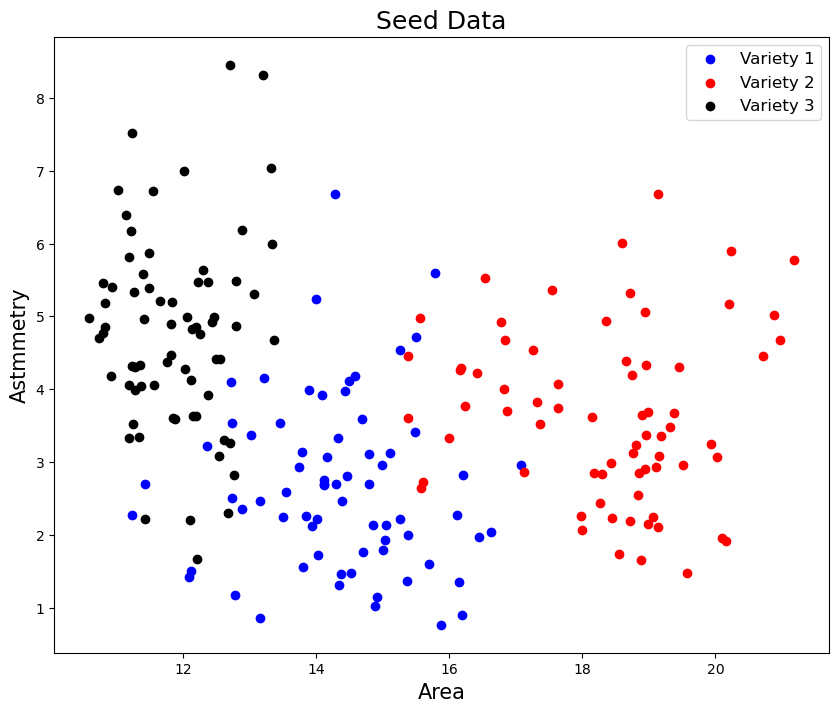

In [3]:
plt.figure(figsize=(10, 8))
plt.title("Seed Data", fontsize=18)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Variety 1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], c='red', label='Variety 2')
plt.scatter(X[y == 3, 0], X[y == 3, 1], c='black', label='Variety 3')
plt.xlabel("Area", fontsize=15)
plt.ylabel("Astmmetry", fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=15)
dbscan_labels = dbscan.fit_predict(X_scaled)

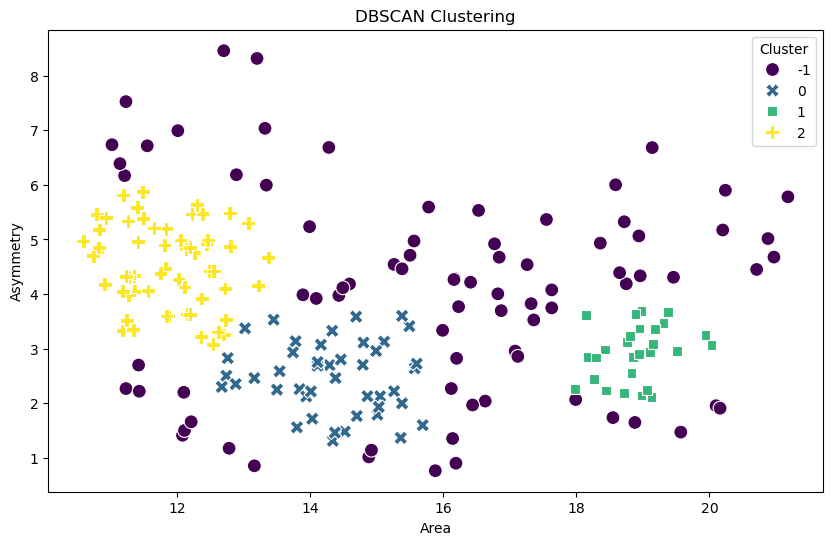

In [5]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan_labels, palette='viridis', style=dbscan_labels, s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Area')
plt.ylabel('Asymmetry')
plt.legend(title='Cluster')
plt.show()

### Analysis of DBSCAN Results

The DBSCAN algorithm struggles significantly with this dataset due to the high degree of overlap between the groups. While it successfully identifies the distinct clusters, this comes at the cost of a large amount of outliers, otherwise the groups would be connected by core points and get classified as one group. This limitation arises because DBSCAN relies on density-based clustering, which becomes less effective when clusters have overlapping densities.

There are a large number of points classified as noise or outliers. DBSCAN marks these points as such because they reside in low-density regions and do not meet the minimum density requirements (`min_samples`) within the specified radius (`eps`). This behavior highlights DBSCAN's sensitivity to parameter tuning and its inability to handle datasets with overlapping clusters effectively. 

In summary, while DBSCAN is a powerful clustering algorithm for datasets with well-separated clusters and varying shapes, it is less suitable for datasets like this one, where clusters overlap significantly and density variations are minimal.